In [3]:
import numpy as np # We'll be storing our data as numpy arrays
import os # For handling directories
from PIL import Image # For handling the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # Plotting

In [4]:
lookup = dict()
reverselookup = dict()
count = 0
for j in os.listdir('leapGestRecog\\00'):
    if not j.startswith('.'): # If running this code locally, this is to 
                              # ensure you aren't reading in hidden folders
        lookup[j] = count
        reverselookup[count] = j
        count = count + 1
lookup

{'01_palm': 0,
 '02_l': 1,
 '03_fist': 2,
 '04_fist_moved': 3,
 '05_thumb': 4,
 '06_index': 5,
 '07_ok': 6,
 '08_palm_moved': 7,
 '09_c': 8,
 '10_down': 9}

In [5]:
x_data = []
y_data = []
datacount = 0 # We'll use this to tally how many images are in our dataset
for i in range(0, 10): # Loop over the ten top-level folders
    for j in os.listdir('leapGestRecog\\0' + str(i) + '/'):
        if not j.startswith('.'): # Again avoid hidden folders
            count = 0 # To tally images of a given gesture
            for k in os.listdir('leapGestRecog\\0' + 
                                str(i) + '/' + j + '/'):
                                # Loop over the images
                img = Image.open('leapGestRecog\\0' + 
                                 str(i) + '/' + j + '/' + k).convert('L')
                                # Read in and convert to greyscale
                img = img.resize((320, 120))
                arr = np.array(img)
                x_data.append(arr) 
                count = count + 1
            y_values = np.full((count, 1), lookup[j]) 
            y_data.append(y_values)
            datacount = datacount + count
x_data = np.array(x_data, dtype = 'float32')
y_data = np.array(y_data)
y_data = y_data.reshape(datacount, 1) # Reshape to be the correct size

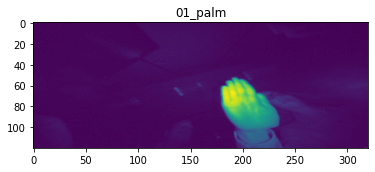

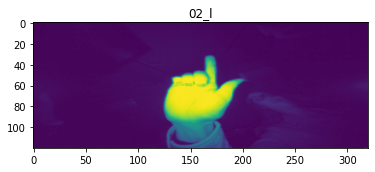

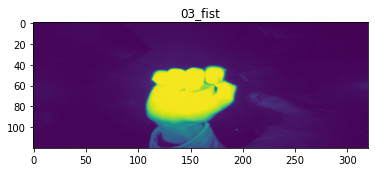

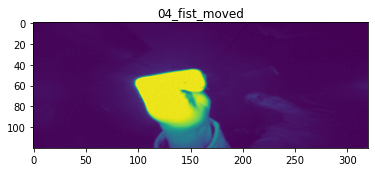

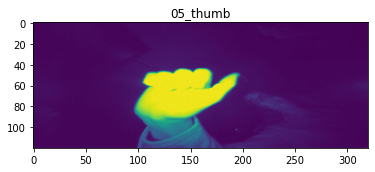

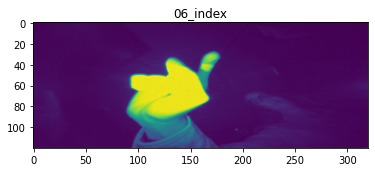

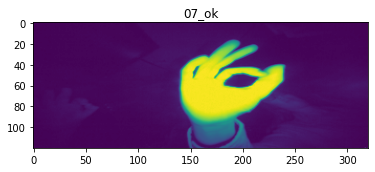

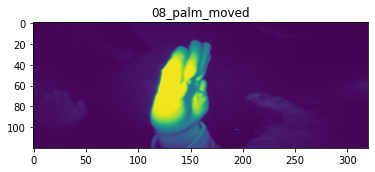

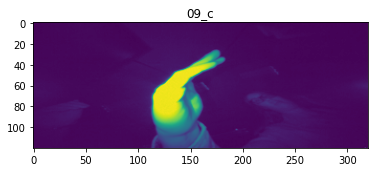

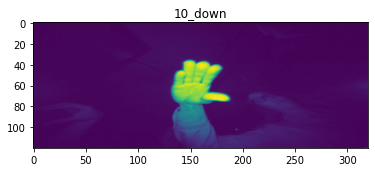

In [6]:
from random import randint
for i in range(0, 10):
    plt.imshow(x_data[i*200 , :, :])
    plt.title(reverselookup[y_data[i*200 ,0]])
    plt.show()

In [7]:
import keras
from keras.utils import to_categorical
y_data = to_categorical(y_data)

In [8]:
x_data = x_data.reshape((datacount, 120, 320, 1))
x_data /= 255

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_further,y_train,y_further = train_test_split(x_data,y_data,test_size = 0.2)
x_validate,x_test,y_validate,y_test = train_test_split(x_further,y_further,test_size = 0.5)

In [10]:
from keras import layers
from keras import models

In [11]:
model=models.Sequential()
model.add(layers.Conv2D(32, (5, 5), strides=(2, 2), activation='relu', input_shape=(120, 320,1))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [12]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [20]:
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))
keras.backend.set_session(sess)

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce GTX 1060 6GB, pci bus id: 0000:01:00.0, compute capability: 6.1



In [21]:
with tf.device('GPU:0'):
    model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=10, batch_size=64, verbose=1, validation_data=(x_validate, y_validate))

Epoch 1/10
250/250 [==============================] - 24s 32ms/step - loss: 0.2817 - accuracy: 0.9112 - val_loss: 0.0035 - val_accuracy: 0.9990
Epoch 2/10
250/250 [==============================] - 7s 29ms/step - loss: 0.0183 - accuracy: 0.9954 - val_loss: 0.0082 - val_accuracy: 0.9970
Epoch 3/10
250/250 [==============================] - 7s 29ms/step - loss: 0.0063 - accuracy: 0.9983 - val_loss: 9.9527e-05 - val_accuracy: 1.0000
Epoch 4/10
250/250 [==============================] - 7s 29ms/step - loss: 0.0035 - accuracy: 0.9991 - val_loss: 0.0051 - val_accuracy: 0.9995
Epoch 5/10
250/250 [==============================] - 7s 29ms/step - loss: 0.0027 - accuracy: 0.9995 - val_loss: 4.0232e-04 - val_accuracy: 1.0000
Epoch 6/10
250/250 [==============================] - 9s 35ms/step - loss: 0.0021 - accuracy: 0.9994 - val_loss: 0.0032 - val_accuracy: 0.9995
Epoch 7/10
250/250 [==============================] - 7s 30ms/step - loss: 0.0015 - accuracy: 0.9999 - val_loss: 0.0040 - val_accurac

In [22]:
[loss, acc] = model.evaluate(x_test,y_test,verbose=1)
print("Accuracy:" + str(acc))

63/63 [==============================] - 1s 11ms/step - loss: 6.5235e-05 - accuracy: 1.0000
Accuracy:1.0


In [23]:
model.save('handrecognition_model.h5')

In [25]:
predictions = model.predict(x_test) # Make predictions towards the test set
np.argmax(predictions[0]), np.argmax(y_test[0]) # If same, got it right


63/63 [==============================] - 1s 8ms/step


(8, 8)

In [ ]:
model = keras.models.load_model('handrecognition_model.h5')

In [26]:
import cv2

In [31]:
reverselookup

{0: '01_palm',
 1: '02_l',
 2: '03_fist',
 3: '04_fist_moved',
 4: '05_thumb',
 5: '06_index',
 6: '07_ok',
 7: '08_palm_moved',
 8: '09_c',
 9: '10_down'}

In [45]:
# Initialize the webcam for Hand Gesture Recognition Python project
cap = cv2.VideoCapture(0)
# cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
# cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 240)
queue = []
while True:
    X=[]
    # Read each frame from the webcam
    _, frame = cap.read()
    x , y, c = frame.shape
    # print(frame.shape)

    # don't know if this matters
    # Flip the frame vertically
    # frame = cv2.flip(frame, 1)


    # convert frame to black and white
    img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (320, 120))

    # print(frame.shape)

    X.append(img)
    
    X = np.array(X, dtype="float32")
    X = X.reshape(1, 120, 320, 1) # Needed to reshape so CNN knows it's different images
    # print(X.shape)
    prediction = model.predict(X, verbose=0)
    # print(np.argmax(prediction))
    

    # Show the final output
    className = reverselookup[np.argmax(prediction)]
    queue.append(className)
    if len(queue) > 10:
        queue.pop(0)
    temp_set = set(queue)
    if len(temp_set) == 1 and queue[0] == '07_ok':
        cv2.imwrite('c1.png', frame)
        cv2.destroyAllWindows()
        break

    cv2.putText(frame, className, (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 
                   1, (0,0,255), 2, cv2.LINE_AA)
    cv2.imshow("Output", frame)
    if cv2.waitKey(1) == ord('q'):
        break

# release the webcam and destroy all active windows
cap.release()
cv2.destroyAllWindows()

In [38]:
list(set(['01_palm']))[0]

{'01_palm'}

In [44]:
cap = cv2.VideoCapture(0) # video capture source camera (Here webcam of laptop) 
ret,frame = cap.read() # return a single frame in variable `frame`

while(True):
    cv2.imshow('img1',frame) #display the captured image
    if cv2.waitKey(1) & 0xFF == ord('y'): #save on pressing 'y' 
        cv2.imwrite('c1.png',frame)
        cv2.destroyAllWindows()
        break

cap.release()